In [ ]:
# Ellen Davenport April 2025
# This script looks at the adjustments made between the first and last iterations of TPOSE 2012
# In particular this looks at surface heat flux adjustments

In [1]:
import xarray as xr
from open_tpose import tpose2012_iter0, tpose2012
import numpy as np
import warnings
import matplotlib.pyplot as plt
import cmocean.cm as cmo
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 16
prefix = ['diag_surf','diag_state']

# Open TPOSE 2012
ds_2012 = tpose2012(prefix)
N = len(ds_2012.time)
ds_2012['time'] = range(len(ds_2012.time))

lats = ds_2012.YC.data
lons = ds_2012.XC.data
depths = ds_2012.Z.data

# specific heat and reference density
rho_0 = 1035
Cp = 3994

# Open TPOSE 2012 iteration 0
ds_2012_iter0 = tpose2012_iter0(prefix)
N = len(ds_2012_iter0.time)
ds_2012_iter0['time'] = range(len(ds_2012_iter0.time))

opening 2012
Days in 2012: (should be 366)
366
setting up 2012
opening 2012
Days in 2012: (should be 366)
366


In [2]:
# Subtract incoming shortwave from total surface flux so that we can inspect both components (TFLUX includes oceQsw)
ds_2012['TFLUX'] = ds_2012.TFLUX - ds_2012.oceQsw
ds_2012_iter0['TFLUX'] = ds_2012_iter0.TFLUX - ds_2012_iter0.oceQsw

In [3]:
# set latitude and longitude ranges 
latMin = -10.0
latMax = 10.0
latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonMin = 190.0
lonMax = 250.0
lonli = np.argmin(np.abs(lons - lonMin))
lonui = np.argmin(np.abs(lons - lonMax)) + 1

# calculate mean surface heat fluxes (in W/m2) for all of 2012 in both data sets
mean_2012 = rho_0*Cp*(ds_2012.TFLUX[:,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_2012_iter0 = rho_0*Cp*(ds_2012_iter0.TFLUX[:,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_SW = rho_0*Cp*(ds_2012.oceQsw[:,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_SW_iter0 = rho_0*Cp*(ds_2012_iter0.oceQsw[:,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')

# calculate mean surface heat fluxes (in W/m2) for each season of 2012 in both data sets
#DJF
TFLUX_DJF_concat = xr.concat([ds_2012.TFLUX[:60,latli:latui,lonli:lonui],ds_2012.TFLUX[336:,latli:latui,lonli:lonui]],dim='time')
mean_2012_DJF = rho_0*Cp*(TFLUX_DJF_concat/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
TFLUX_DJF_concat_iter0 = xr.concat([ds_2012_iter0.TFLUX[:60,latli:latui,lonli:lonui],ds_2012_iter0.TFLUX[336:,latli:latui,lonli:lonui]],dim='time')
mean_2012_iter0_DJF = rho_0*Cp*(TFLUX_DJF_concat_iter0/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#MAM
mean_2012_MAM = rho_0*Cp*(ds_2012.TFLUX[60:152,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_2012_iter0_MAM = rho_0*Cp*(ds_2012_iter0.TFLUX[60:152,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#JJA
mean_2012_JJA = rho_0*Cp*(ds_2012.TFLUX[152:244,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_2012_iter0_JJA = rho_0*Cp*(ds_2012_iter0.TFLUX[152:244,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#SON
mean_2012_SON = rho_0*Cp*(ds_2012.TFLUX[244:336,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_2012_iter0_SON = rho_0*Cp*(ds_2012_iter0.TFLUX[244:336,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')

# calculate mean shortwave fluxes (in W/m2) for each season of 2012 in both data sets
#DJF
SW_DJF_concat = xr.concat([ds_2012.oceQsw[:60,latli:latui,lonli:lonui],ds_2012.oceQsw[336:,latli:latui,lonli:lonui]],dim='time')
mean_SW_DJF = rho_0*Cp*(SW_DJF_concat/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
SW_DJF_concat_iter0 = xr.concat([ds_2012_iter0.oceQsw[:60,latli:latui,lonli:lonui],ds_2012_iter0.oceQsw[336:,latli:latui,lonli:lonui]],dim='time')
mean_SW_iter0_DJF = rho_0*Cp*(SW_DJF_concat_iter0/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#MAM
mean_SW_MAM = rho_0*Cp*(ds_2012.oceQsw[60:152,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_SW_iter0_MAM = rho_0*Cp*(ds_2012_iter0.oceQsw[60:152,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#JJA
mean_SW_JJA = rho_0*Cp*(ds_2012.oceQsw[152:244,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_SW_iter0_JJA = rho_0*Cp*(ds_2012_iter0.oceQsw[152:244,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
#SON
mean_SW_SON = rho_0*Cp*(ds_2012.oceQsw[244:336,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')
mean_SW_iter0_SON = rho_0*Cp*(ds_2012_iter0.oceQsw[244:336,latli:latui,lonli:lonui]/(rho_0*Cp*ds_2012.hFacC[0,latli:latui,lonli:lonui]*ds_2012.drF[0])).mean(dim='time')

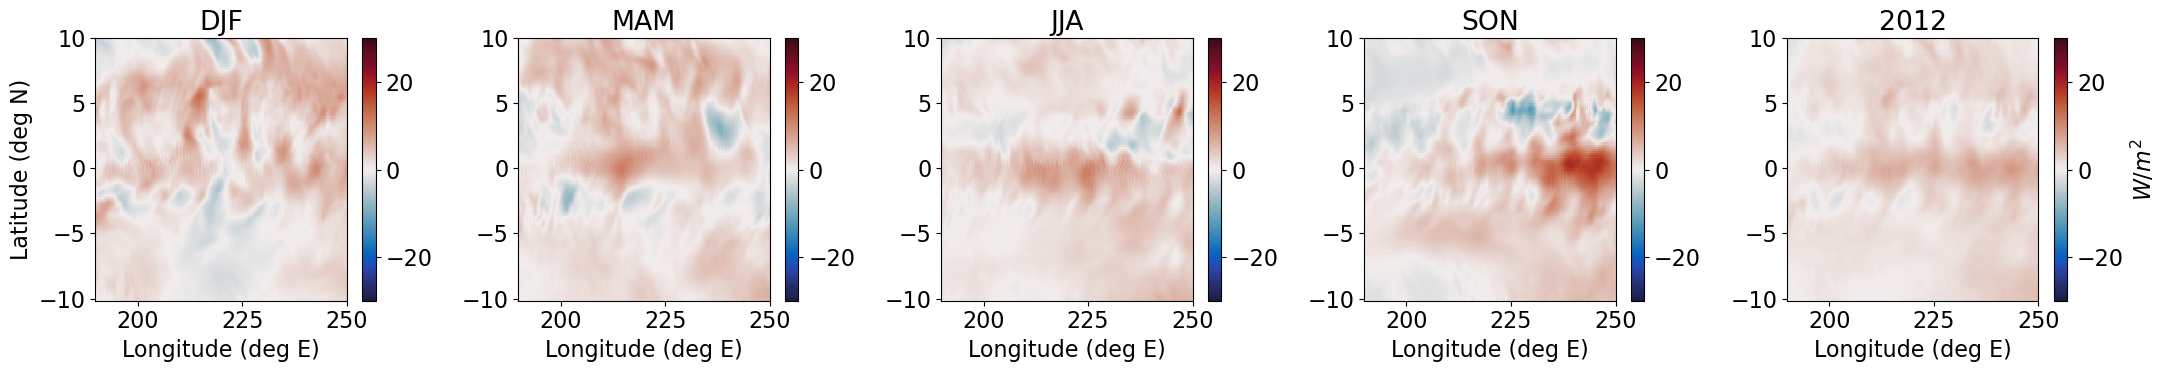

In [4]:
# Plott all surface heat flux adjustments (recombine for total heat flux)
fig, ax = plt.subplots(figsize=(22,4), nrows=1, ncols=5)
vmin = -30
vmax = 30
((mean_2012_DJF - mean_2012_iter0_DJF)+(mean_SW_DJF - mean_SW_iter0_DJF)).plot(ax=ax[0],cmap=cmo.balance,cbar_kwargs={'label':''},vmin=vmin,vmax=vmax)
ax[0].set_title('DJF')
ax[0].set_ylabel('Latitude (deg N)')
ax[0].set_xlabel('Longitude (deg E)')

((mean_2012_MAM - mean_2012_iter0_MAM)+(mean_SW_MAM - mean_SW_iter0_MAM)).plot(ax=ax[1],cmap=cmo.balance,cbar_kwargs={'label':''},vmin=vmin,vmax=vmax)
ax[1].set_title('MAM')
ax[1].set_ylabel('')
ax[1].set_xlabel('Longitude (deg E)')

((mean_2012_JJA - mean_2012_iter0_JJA)+(mean_SW_JJA - mean_SW_iter0_JJA)).plot(ax=ax[2],cmap=cmo.balance,cbar_kwargs={'label':''},vmin=vmin,vmax=vmax)
ax[2].set_title('JJA')
ax[2].set_ylabel('')
ax[2].set_xlabel('Longitude (deg E)')

((mean_2012_SON - mean_2012_iter0_SON)+(mean_SW_SON - mean_SW_iter0_SON)).plot(ax=ax[3],cmap=cmo.balance,cbar_kwargs={'label':''},vmin=vmin,vmax=vmax)
ax[3].set_title('SON')
ax[3].set_ylabel('')
ax[3].set_xlabel('Longitude (deg E)')

((mean_2012 - mean_2012_iter0)+(mean_SW - mean_SW_iter0)).plot(ax=ax[4],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[4].set_title('2012')
ax[4].set_ylabel('')
ax[4].set_xlabel('Longitude (deg E)')

plt.tight_layout()

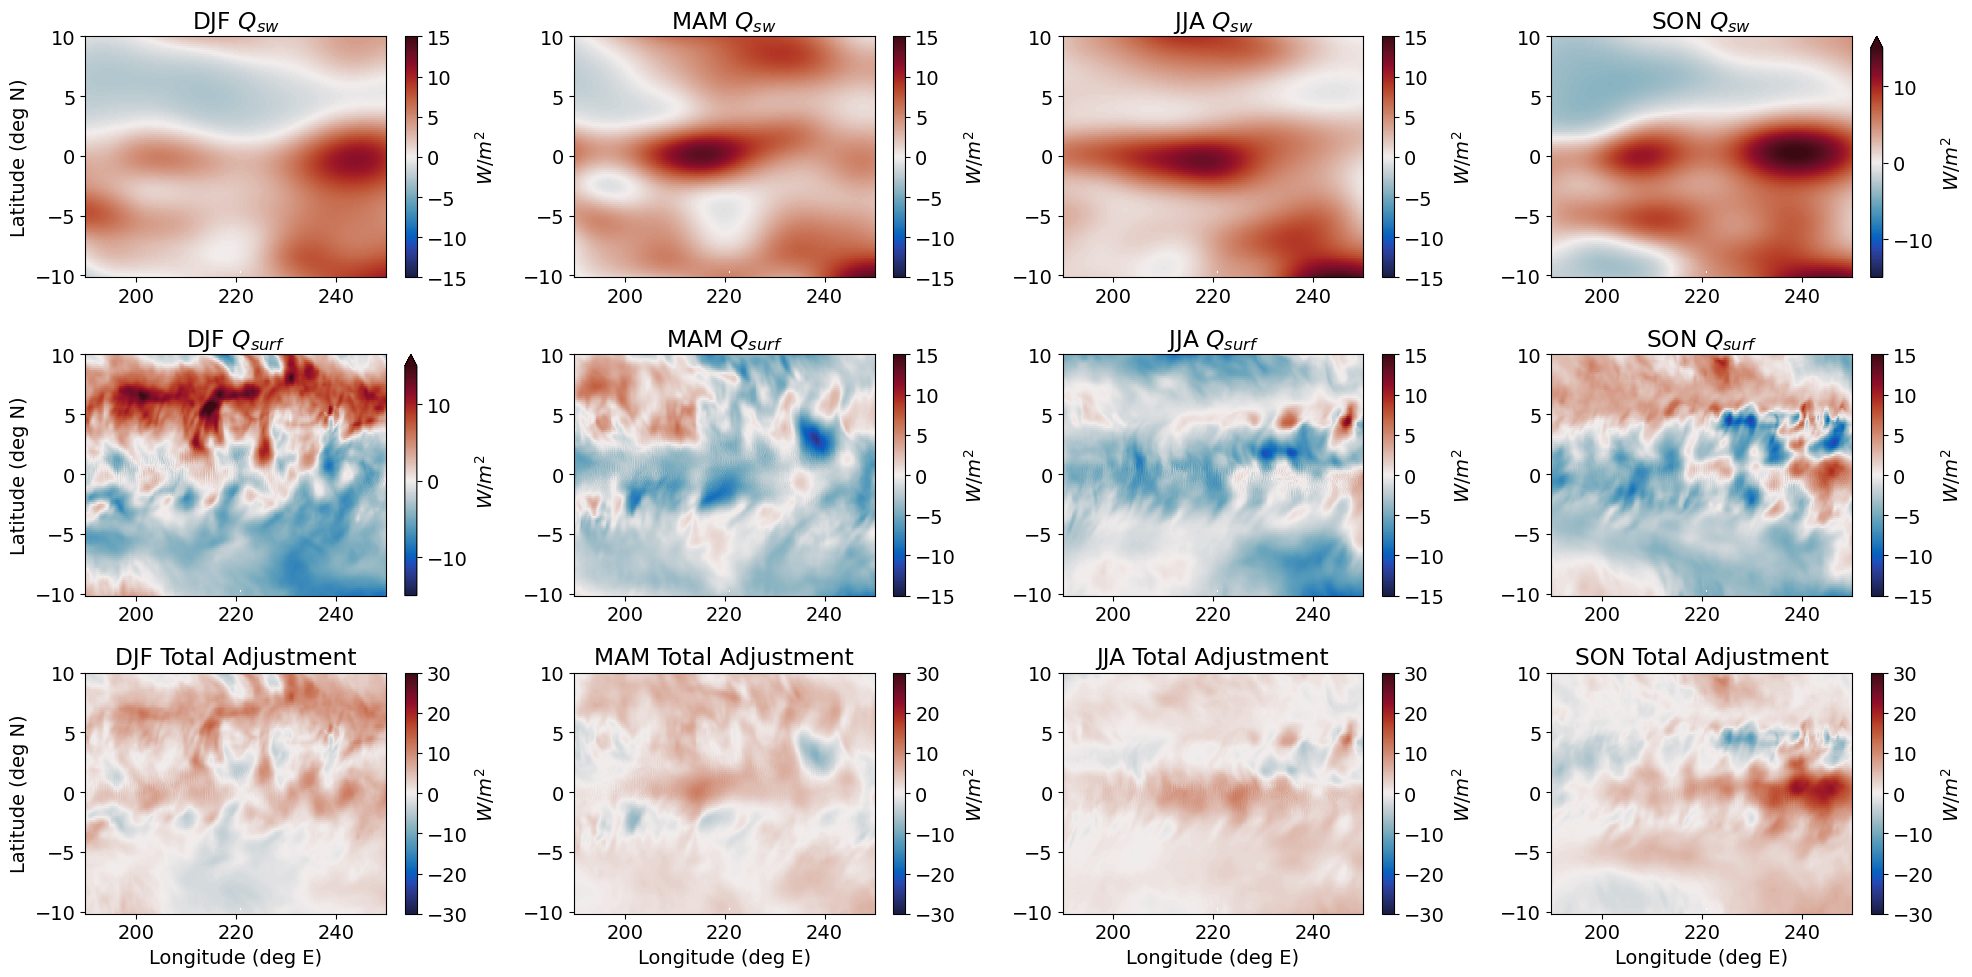

In [4]:
# Plott all surface heat flux adjustments including separate components (recombine for total heat flux)
vmin = -15
vmax = 15
fig, ax = plt.subplots(figsize=(20,10), nrows=3, ncols=4)
(mean_SW_DJF - mean_SW_iter0_DJF).plot(ax=ax[0,0],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[0,0].set_title('DJF $Q_{sw}$')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Latitude (deg N)')
(mean_2012_DJF - mean_2012_iter0_DJF).plot(ax=ax[1,0],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[1,0].set_title('DJF $Q_{surf}$')
ax[1,0].set_ylabel('Latitude (deg N)')
ax[1,0].set_xlabel('')
vmin = -30
vmax = 30
((mean_2012_DJF - mean_2012_iter0_DJF)+(mean_SW_DJF - mean_SW_iter0_DJF)).plot(ax=ax[2,0],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[2,0].set_title('DJF Total Adjustment')
ax[2,0].set_ylabel('Latitude (deg N)')
ax[2,0].set_xlabel('Longitude (deg E)')

vmin = -15
vmax = 15
(mean_SW_MAM - mean_SW_iter0_MAM).plot(ax=ax[0,1],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[0,1].set_title('MAM $Q_{sw}$')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
(mean_2012_MAM - mean_2012_iter0_MAM).plot(ax=ax[1,1],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[1,1].set_title('MAM $Q_{surf}$')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
vmin = -30
vmax = 30
((mean_2012_MAM - mean_2012_iter0_MAM)+(mean_SW_MAM - mean_SW_iter0_MAM)).plot(ax=ax[2,1],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[2,1].set_title('MAM Total Adjustment')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('Longitude (deg E)')

vmin = -15
vmax = 15
(mean_SW_JJA - mean_SW_iter0_JJA).plot(ax=ax[0,2],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[0,2].set_title('JJA $Q_{sw}$')
ax[0,2].set_ylabel('')
ax[0,2].set_xlabel('')
(mean_2012_JJA - mean_2012_iter0_JJA).plot(ax=ax[1,2],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[1,2].set_title('JJA $Q_{surf}$')
ax[1,2].set_ylabel('')
ax[1,2].set_xlabel('')
vmin = -30
vmax = 30
((mean_2012_JJA - mean_2012_iter0_JJA)+(mean_SW_JJA - mean_SW_iter0_JJA)).plot(ax=ax[2,2],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[2,2].set_title('JJA Total Adjustment')
ax[2,2].set_ylabel('')
ax[2,2].set_xlabel('Longitude (deg E)')

vmin = -15
vmax = 15
(mean_SW_SON - mean_SW_iter0_SON).plot(ax=ax[0,3],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[0,3].set_title('SON $Q_{sw}$')
ax[0,3].set_xlabel('')
ax[0,3].set_ylabel('')
(mean_2012_SON - mean_2012_iter0_SON).plot(ax=ax[1,3],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[1,3].set_title('SON $Q_{surf}$')
ax[1,3].set_ylabel('')
ax[1,3].set_xlabel('')
vmin = -30
vmax = 30
((mean_2012_SON - mean_2012_iter0_SON)+(mean_SW_SON - mean_SW_iter0_SON)).plot(ax=ax[2,3],cmap=cmo.balance,cbar_kwargs={'label':'$W/m^2$'},vmin=vmin,vmax=vmax)
ax[2,3].set_title('SON Total Adjustment')
ax[2,3].set_ylabel('')
ax[2,3].set_xlabel('Longitude (deg E)')

plt.tight_layout()